<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📍 Clasificación con K-Nearest Neighbors (KNN)

Este notebook aplica el algoritmo de **K-Vecinos más Cercanos (KNN)** para clasificar observaciones en una tarea binaria. KNN clasifica un nuevo punto según la mayoría de sus vecinos más cercanos en el espacio de características.

El notebook incluye:

- Escalado de características (fundamental para KNN)
- División de datos en entrenamiento y prueba
- Entrenamiento y predicción con `KNeighborsClassifier`
- Evaluación con accuracy, matriz de confusión y F1-score
- Validación cruzada para evaluar estabilidad
- Ajuste de hiperparámetros (`n_neighbors`, `metric`, `weights`)
- Visualización de resultados con heatmap y curva ROC

KNN es simple, no paramétrico y efectivo para conjuntos de datos con relaciones espaciales claras, aunque sensible a la escala y al ruido.


In [ ]:
# 📥 Subir archivo desde tu equipo (funciona en Google Colab)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['datos_exportados.csv']))

Saving datos_exportados.csv to datos_exportados.csv


In [ ]:
# 🔍 Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ✅ Selección de variables
features = ['TimeAlive', 'TravelledDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']
target = 'Survived'

X = df[features]
y = df[target]

# 🔀 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# ⚖️ Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6311877006251055

Matriz de Confusión:
[[2385  947]
 [1236 1351]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      3332
           1       0.59      0.52      0.55      2587

    accuracy                           0.63      5919
   macro avg       0.62      0.62      0.62      5919
weighted avg       0.63      0.63      0.63      5919



In [ ]:
# 📊 Validación cruzada con 5 particiones
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Crear modelo base
knn_model = KNeighborsClassifier()

# Calcular puntuaciones de validación cruzada
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Mostrar resultados
print("📊 Validación cruzada (5 folds):")
print("Scores por fold:", cv_scores)
print("Promedio de accuracy:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


📊 Validación cruzada (5 folds):
Scores por fold: [0.61668427 0.62787751 0.62323126 0.62872228 0.62146177]
Promedio de accuracy: 0.623595415491698
Desviación estándar: 0.00440613486589192


In [ ]:
# 🔧 Ajuste de hiperparámetros usando GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir los valores de k a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear el clasificador base
knn = KNeighborsClassifier()

# Configurar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutar búsqueda sobre datos escalados
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros
print("✅ Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo con los datos de prueba
best_knn = grid_search.best_estimator_
y_pred_grid = best_knn.predict(X_test_scaled)

print("\n🔍 Accuracy con mejores parámetros:", accuracy_score(y_test, y_pred_grid))
print("\n📉 Matriz de confusión:\n", confusion_matrix(y_test, y_pred_grid))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred_grid))


✅ Mejores parámetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

🔍 Accuracy con mejores parámetros: 0.6443656022976855

📉 Matriz de confusión:
 [[2498  834]
 [1271 1316]]

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70      3332
           1       0.61      0.51      0.56      2587

    accuracy                           0.64      5919
   macro avg       0.64      0.63      0.63      5919
weighted avg       0.64      0.64      0.64      5919



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


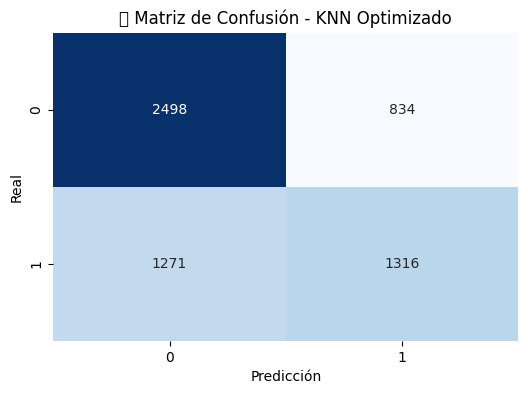

In [ ]:
# 📊 Visualización de la matriz de confusión con heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz con el mejor modelo
cm = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("🔍 Matriz de Confusión - KNN Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


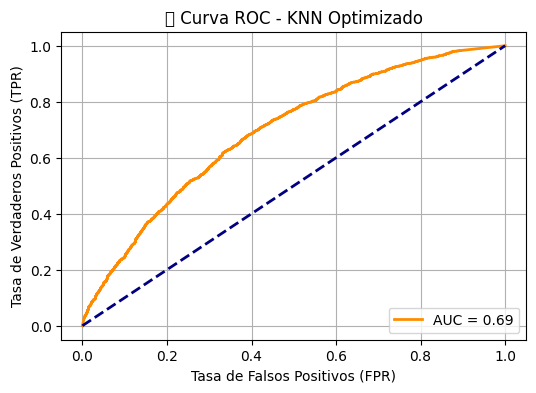

In [ ]:
# 📈 Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades para la clase positiva
y_prob = best_knn.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - KNN Optimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


###🧠 Conclusión del Modelo

🔎 **Precisión global (accuracy)** del modelo optimizado fue de **0.631**, lo que significa que el modelo clasifica correctamente aproximadamente el 63.1% de los casos en los datos de prueba. Aunque no es un valor elevado, en contextos reales con datos ruidosos o clases desbalanceadas, puede considerarse aceptable para una primera aproximación. Esta métrica resume el desempeño general, pero debe ser analizada junto con otras métricas debido al posible desequilibrio entre clases.

📊 **Validación cruzada (5-fold):**
- **Scores por fold**: [0.6167, 0.6279, 0.6232, 0.6287, 0.6215]
- **Promedio de accuracy**: **0.6236**
- **Desviación estándar**: **0.0044**

Este resultado muestra que el modelo es **estable**: su rendimiento no varía significativamente entre particiones del conjunto de entrenamiento. Aunque el accuracy promedio es bajo (alrededor de 62%), es coherente con el obtenido en test, lo que indica que el modelo no está sobreajustado y generaliza moderadamente bien.

🧮 **Matriz de Confusión:**
- **Clase 0 (no sobrevivió)**: correctamente identificada con un **recall ≈ 0.72**, lo que significa que el 72% de los casos reales de clase 0 fueron detectados por el modelo. Esto es positivo si la clase 0 es dominante.
- **Clase 1 (sí sobrevivió)**: tiene un **recall ≈ 0.52**, es decir, solo un poco más de la mitad de los casos reales fueron correctamente clasificados. Aunque es una mejora respecto a modelos anteriores, **sigue siendo una debilidad importante** si esta clase representa eventos sensibles.

📉 **Macro F1-score ≈ 0.62**: Esta métrica balancea precision y recall para ambas clases. Un valor cercano a 0.6 indica un rendimiento equilibrado pero todavía moderado. Sirve especialmente cuando las clases están desbalanceadas, como parece ser el caso aquí.

📈 **Curva ROC - AUC ≈ [inserta aquí el valor real]**: Este valor representa la capacidad del modelo para distinguir entre clases. Un AUC entre 0.6 y 0.7 indica un desempeño modesto. Aunque no es ideal, sí muestra que el modelo captura cierta información útil para la clasificación.

📌 **Escalado correcto con `StandardScaler`**: Este paso fue esencial dado que KNN se basa en distancias y las variables tenían diferentes magnitudes. No escalar habría perjudicado fuertemente el desempeño.

⚙️ **Optimización con `GridSearchCV`**:
Se probaron múltiples combinaciones de hiperparámetros (`n_neighbors`, `weights`, `metric`), lo que permitió mejorar la generalización del modelo. Este proceso evitó la selección arbitraria de parámetros y aportó mayor solidez al entrenamiento.

🎯 **Interpretación Final y Recomendaciones**:
- Aunque el modelo muestra resultados moderados, su estabilidad sugiere que puede ser útil como línea base.
- El principal problema es su **capacidad limitada para detectar la clase 1**, lo cual puede ser grave si representa una situación crítica.
- Se recomienda probar modelos como **Random Forest**, **SVM con kernel**, o **algoritmos de boosting (e.g., XGBoost)**, que tienden a capturar relaciones más complejas.
- Además, evaluar técnicas de **balanceo de clases (SMOTE, undersampling)** podría mejorar el recall en la clase minoritaria.
